<a href="https://colab.research.google.com/github/quetion/time_series_SCU/blob/main/MA_siumulation_and_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import yfinance as yf


In [19]:
ar1 = ArmaProcess(ar=[1,-0.9]) # AR(1)
#ma1 = ArmaProcess(ma=[1, 0.7]) # MA(1)


In [20]:
#test = ma1.generate_sample(nsample=200)
test = ar1.generate_sample(nsample=200)

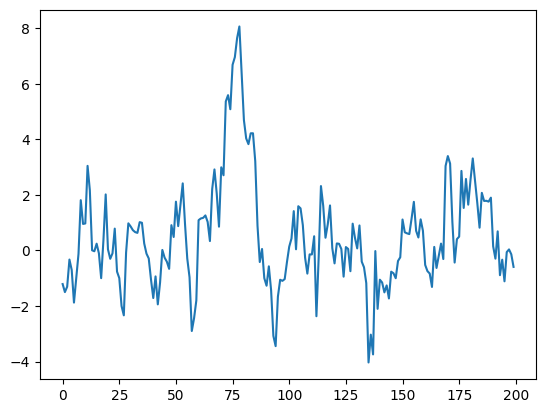

In [21]:
plt.plot(test)

In [50]:
data = yf.download("^gspc", start="2021-01-01", end="2025-01-01")
data['ret'] = np.log(data['Close']).diff()
#data['log_return'] = np.log(data['Adj Close']).diff().dropna()
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,ret
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,
Date,,,,,,
2021-01-04,3700.649902,3769.989990,3662.709961,3764.610107,5015000000,NaN
2021-01-05,3726.860107,3737.830078,3695.070068,3698.020020,4591020000,0.007058
2021-01-06,3748.139893,3783.040039,3705.340088,3712.199951,6064110000,0.005694
2021-01-07,3803.790039,3811.550049,3764.709961,3764.709961,5099160000,0.014738
2021-01-08,3824.679932,3826.689941,3783.600098,3815.050049,4773040000,0.005477


In [51]:
test = data['ret']
test

,ret
Date,
2021-01-04,NaN
2021-01-05,0.007058
2021-01-06,0.005694
2021-01-07,0.014738
2021-01-08,0.005477
...,...
2024-12-24,0.010982
2024-12-26,-0.000406
2024-12-27,-0.011117


In [52]:
test

,ret
Date,
2021-01-04,NaN
2021-01-05,0.007058
2021-01-06,0.005694
2021-01-07,0.014738
2021-01-08,0.005477
...,...
2024-12-24,0.010982
2024-12-26,-0.000406
2024-12-27,-0.011117


In [55]:
# MA model estimation
from statsmodels.tsa.arima.model import ARIMA

y = test
model = ARIMA(y, order=(0, 0, 2))
result = model.fit()
print(result.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    ret   No. Observations:                 1005
Model:                 ARIMA(0, 0, 2)   Log Likelihood                3161.481
Date:                Thu, 10 Apr 2025   AIC                          -6314.962
Time:                        06:33:21   BIC                          -6295.311
Sample:                             0   HQIC                         -6307.495
                               - 1005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.420      0.156      -0.000       0.001
ma.L1          0.0047      0.027      0.174      0.862      -0.048       0.058
ma.L2         -0.0449      0.026     -1.727      0.0

In [58]:
# AR model estimation
from statsmodels.tsa.arima.model import ARIMA

y = test
model = ARIMA(y, order=(2, 0, 0))
result = model.fit()
print(result.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    ret   No. Observations:                 1005
Model:                 ARIMA(2, 0, 0)   Log Likelihood                3161.486
Date:                Thu, 10 Apr 2025   AIC                          -6314.972
Time:                        06:35:27   BIC                          -6295.321
Sample:                             0   HQIC                         -6307.505
                               - 1005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.415      0.157      -0.000       0.001
ar.L1          0.0077      0.027      0.286      0.775      -0.045       0.060
ar.L2         -0.0437      0.026     -1.677      0.0

In [62]:
# ARMA model estimation
from statsmodels.tsa.arima.model import ARIMA

y = test
model = ARIMA(y, order=(2, 0, 1))
result = model.fit()
print(result.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    ret   No. Observations:                 1005
Model:                 ARIMA(2, 0, 1)   Log Likelihood                3162.223
Date:                Thu, 10 Apr 2025   AIC                          -6314.446
Time:                        06:39:16   BIC                          -6289.882
Sample:                             0   HQIC                         -6305.112
                               - 1005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.496      0.135      -0.000       0.001
ar.L1          0.7734      0.153      5.044      0.000       0.473       1.074
ar.L2         -0.0503      0.029     -1.718      0.0